# Memanggil Dataset R02_rice_field.csv

In [1]:
import pandas as pd

dataset = pd.read_csv('R02_rice_field.csv')
dataset

,Production (X),Harvest Area (Y)
0,1329536.00,323589.00
1,1299699.00,329041.00
2,1382905.00,339253.00
3,1419128.00,348223.00
4,1368074.00,337561.00
...,...,...
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42


# Splitting data X dan Y dengan perbandingan 80:20

In [2]:
X = dataset['Production (X)'].values.reshape(-1,1)
Y = dataset['Harvest Area (Y)'].values

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)

# Modelling menggunakan LinearRegression()

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Akurasi dari model

In [5]:
import numpy as np

akurasi = model.score(x_train, y_train)*100
print(f"Akurasi dari modelnya adalah: {np.round(akurasi,2)}%")

Akurasi dari modelnya adalah: 81.3%


# Melakukan prediksi pada Data Testing

In [6]:
predict = model.predict(x_test)
predict

array([306726.95624337, 149591.5262631 , 169993.56427924, 353844.78106441,
       516954.38708121, 172579.17086937, 412912.24315444, 149206.1464785 ,
       139481.97454251, 164013.64424026, 443142.98893937, 322500.49891804,
       424430.67749677, 385097.40618687, 632566.72760117, 712715.87798236,
       142553.37803715, 336947.14122603, 451710.48274165,  79181.5835364 ,
       142493.77215314, 388850.08166617, 516826.7785804 , 312713.67815501,
       405081.6767648 , 369810.02914981, 199302.47553352, 407148.19307376,
       391491.53521069, 174394.55488025, 550104.94051908, 409708.02414649,
       345963.73761984, 175072.95217873, 630902.59575843, 177730.69441828,
       661333.99499655, 119707.50772646, 495429.69819427, 150482.75057686,
       323802.16254721, 423455.68275143, 158291.30037872, 171118.91620947,
       607446.13028981])

# Memeriksa Mean Absolute Error, Mean Squared Error, RMSE, dan R2 Score dari model

In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(predict, y_test)
mse = mean_squared_error(predict, y_test)
rmse = np.sqrt(mse)
akurasi = r2_score(predict, y_test)

print(f'Mean Absolute Error dari model: {mae}')
print(f'Mean Squared Error dari model: {mse}')
print(f'RMSE dari model: {rmse}')
print(f'Akurasinya adalah: {np.round((akurasi*100),2)}%')

Mean Absolute Error dari model: 51963.846719204565
Mean Squared Error dari model: 5942443013.399283
RMSE dari model: 77087.24287065456
Akurasinya adalah: 79.02%


# Visualisasi data menggunakan plot dan scatter

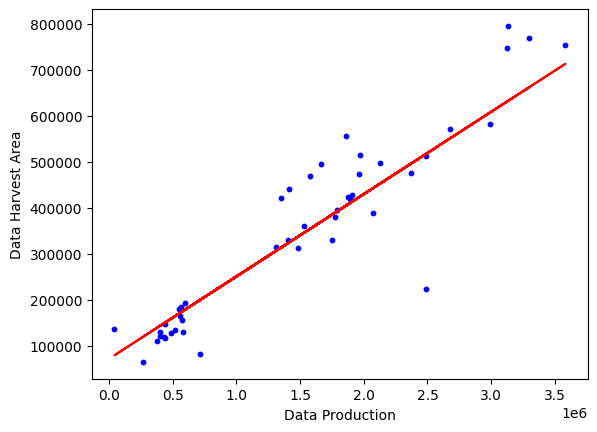

In [8]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, c='blue', s=10)
plt.plot(x_test, predict, c='red')
plt.xlabel("Data Production")
plt.ylabel("Data Harvest Area")
plt.show()